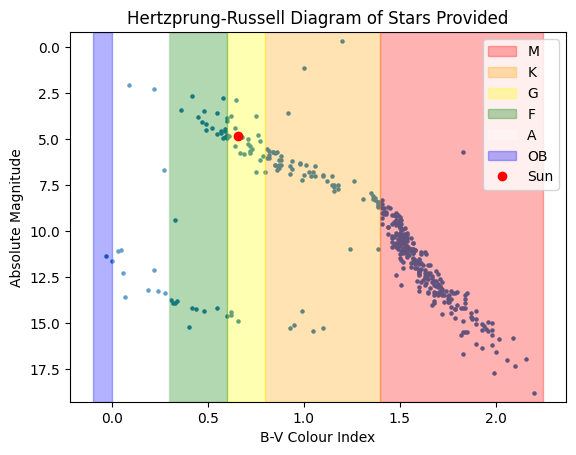

In [128]:
import numpy as np;
from matplotlib import pyplot as mpl;

# Importing the data
path = "NEARBY.csv";
f = open(path, "r");
dataAsString = f.read();
f.close()

# Turning the data into rows
rows = dataAsString.split("\n");

# Processing the data into the correct groups
apparentVisualMagnitudes = [];
bMinusVColorIndexes = [];
trigonometricParallaxes = [];

for row in rows:
    try:
        splitRow = row.split(',');

        apparentVisualMagnitudes.append(float(splitRow[0]));
        bMinusVColorIndexes.append(float(splitRow[1]));
        trigonometricParallaxes.append(float(splitRow[2]));
    
    except:
        break;

# Converting the lists into arrays to allow easier processing
apparentVisualMagnitudes = np.array(apparentVisualMagnitudes);
bMinusVColorIndexes = np.array(bMinusVColorIndexes);
trigonometricParallaxes = np.array(trigonometricParallaxes);

# Calculating the absolute magnitudes
distancesToStars = 1 / trigonometricParallaxes;
absoluteMagnitudes = apparentVisualMagnitudes - 5 * (np.log10(distancesToStars) - 1);

# Plotting the data
mpl.scatter(bMinusVColorIndexes, absoluteMagnitudes, s = 5);
mpl.ylim(max(absoluteMagnitudes) + 0.5, min(absoluteMagnitudes) - 0.5);

mpl.axvspan(1.4, 2.25, color = "red", label = "M", alpha = 0.3);
mpl.axvspan(0.8, 1.4, color = "orange", label = "K", alpha = 0.3);
mpl.axvspan(0.6, 0.8, color = "yellow", label = "G", alpha = 0.3);
mpl.axvspan(0.3, 0.6, color = "green", label = "F", alpha = 0.3);
mpl.axvspan(0.0, 0.3, color = "white", label = "A", alpha = 0.3);
mpl.axvspan(-0.1, 0.0, color = "blue", label = "OB", alpha = 0.3);

mpl.plot(0.656, 4.83, 'ro', label = "Sun")

mpl.legend();
mpl.xlabel("B-V Colour Index");
mpl.ylabel("Absolute Magnitude");
mpl.title("Hertzprung-Russell Diagram of Stars Provided");

mpl.show();

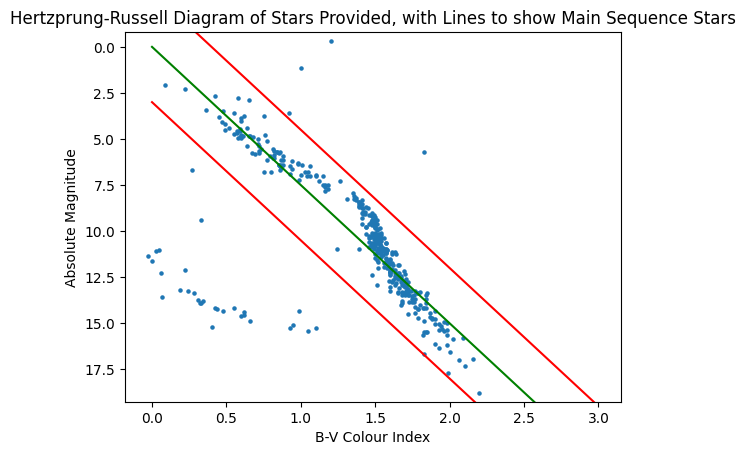

In [129]:
import numpy as np;
from matplotlib import pyplot as mpl;

path = "NEARBY.csv";
f = open(path, "r");
#f.readline(); would read character by character so having to process the whole string instead
dataAsString = f.read();
f.close()

rows = dataAsString.split("\n");

apparentVisualMagnitudes = [];
bMinusVColorIndexes = [];
trigonometricParallaxes = [];

for row in rows:
    try:
        splitRow = row.split(',');

        apparentVisualMagnitudes.append(float(splitRow[0]));
        bMinusVColorIndexes.append(float(splitRow[1]));
        trigonometricParallaxes.append(float(splitRow[2]));
    
    except:
        break;

apparentVisualMagnitudes = np.array(apparentVisualMagnitudes);
bMinusVColorIndexes = np.array(bMinusVColorIndexes);
trigonometricParallaxes = np.array(trigonometricParallaxes);

distancesToStars = 1 / trigonometricParallaxes;
absoluteMagnitudes = apparentVisualMagnitudes - 5 * (np.log10(distancesToStars) - 1);

mpl.scatter(bMinusVColorIndexes, absoluteMagnitudes, s = 5);
mpl.ylim(max(absoluteMagnitudes) + 0.5, min(absoluteMagnitudes) - 0.5);

mpl.xlabel("B-V Colour Index");
mpl.ylabel("Absolute Magnitude");
mpl.title("Hertzprung-Russell Diagram of Stars Provided, with Lines to show Main Sequence Stars");

xb = np.linspace(0, 3, 1000);
yb = (7.5) * xb;
mpl.plot(xb,yb, "g");

xl = np.linspace(0, 3, 1000);
yl = (7.5) * xl + 3;
mpl.plot(xl,yl, "r");

xu = np.linspace(0, 3, 1000);
yu = (7.5) * xu - 3;
mpl.plot(xu,yu, "r");

mpl.show();

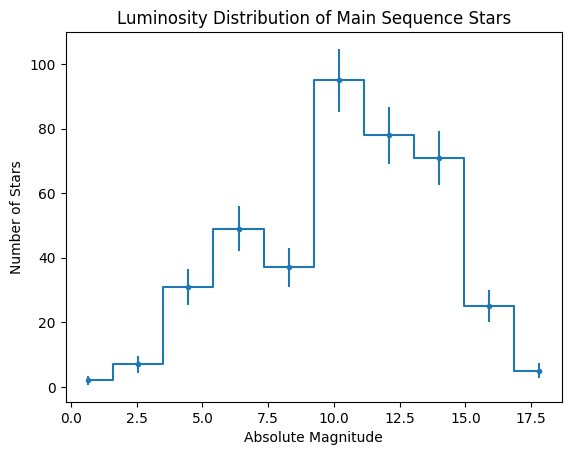

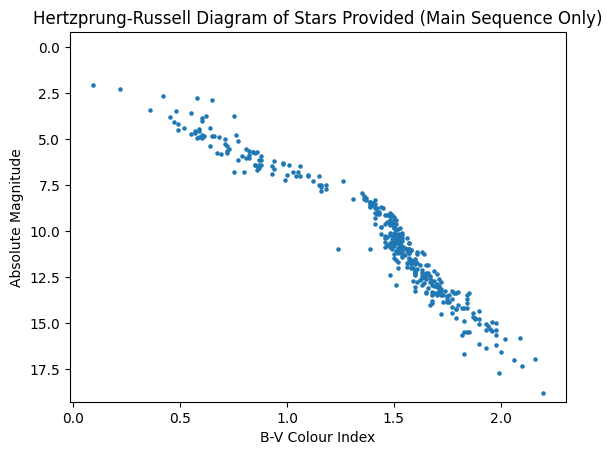

In [130]:
import numpy as np;
from matplotlib import pyplot as mpl;

path = "NEARBY.csv";
f = open(path, "r");
dataAsString = f.read();
f.close()

rows = dataAsString.split("\n");

apparentVisualMagnitudes = [];
bMinusVColorIndexes = [];
trigonometricParallaxes = [];

for row in rows:
    try:
        splitRow = row.split(',');

        apparentVisualMagnitudes.append(float(splitRow[0]));
        bMinusVColorIndexes.append(float(splitRow[1]));
        trigonometricParallaxes.append(float(splitRow[2]));
    
    except:
        break;

apparentVisualMagnitudes = np.array(apparentVisualMagnitudes);
bMinusVColorIndexes = np.array(bMinusVColorIndexes);
trigonometricParallaxes = np.array(trigonometricParallaxes);

distancesToStars = 1 / trigonometricParallaxes;
absoluteMagnitudes = apparentVisualMagnitudes - 5 * (np.log10(distancesToStars) - 1);

# Creating lists to store only main sequence stars
reducedBMinusVColorIndexes = [];
reducedAbsoluteMagnitudes = [];

# Finds all points at a given distance to the line of best fit and classes them as main sequence
for starIndex in range(0, len(absoluteMagnitudes)):
    lineIntersectionPointX = (bMinusVColorIndexes[starIndex] + 7.5 * absoluteMagnitudes[starIndex]) / (7.5 ** 2 + 1);
    distanceToLine = np.sqrt((bMinusVColorIndexes[starIndex] - lineIntersectionPointX) ** 2 + (absoluteMagnitudes[starIndex] - lineIntersectionPointX * 7.5) ** 2);

    if (distanceToLine < 0.4):
        reducedBMinusVColorIndexes.append(bMinusVColorIndexes[starIndex]);
        reducedAbsoluteMagnitudes.append(absoluteMagnitudes[starIndex]);

# Creates the histogram
numberOfStars, bin_edges = np.histogram(absoluteMagnitudes, bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

# Creates an error bar of a standard sqrt(numberOfStars in bin) error
mpl.errorbar(
    bin_centers,
    numberOfStars,
    yerr = numberOfStars**0.5,
    marker = '.',
    drawstyle = 'steps-mid'
);

# Plots the histogram
mpl.xlabel("Absolute Magnitude");
mpl.ylabel("Number of Stars");
mpl.title("Luminosity Distribution of Main Sequence Stars");
mpl.show();

# Creates the HR diagram with only main sequence stars
mpl.scatter(reducedBMinusVColorIndexes, reducedAbsoluteMagnitudes, s = 5);
mpl.ylim(max(absoluteMagnitudes) + 0.5, min(absoluteMagnitudes) - 0.5);

# Plots the HR Diagram
mpl.xlabel("B-V Colour Index");
mpl.ylabel("Absolute Magnitude");
mpl.title("Hertzprung-Russell Diagram of Stars Provided (Main Sequence Only)");
mpl.show();

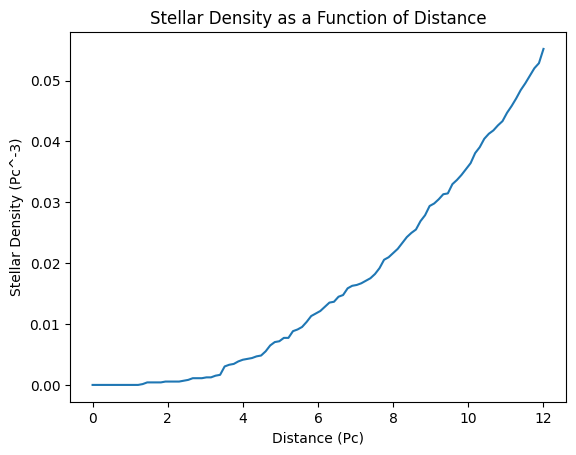

C:\Users\samue\AppData\Local\Temp\ipykernel_21924\1497996539.py:62: RuntimeWarning: divide by zero encountered in log
  mpl.plot(np.log(distance), np.log(StellarDensity), label = "log(Stellar Density)");


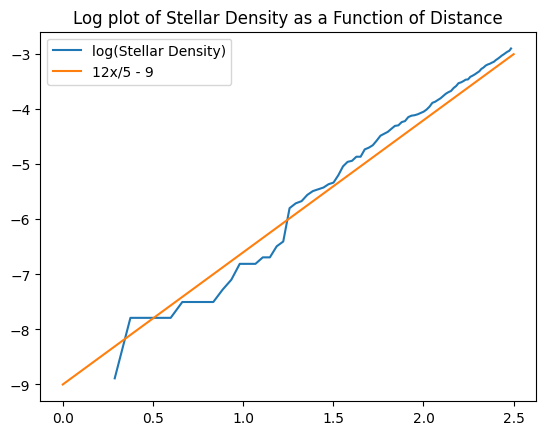

In [133]:
import numpy as np;
from matplotlib import pyplot as mpl;

path = "NEARBY.csv";
f = open(path, "r");
#f.readline(); would read character by character so having to process the whole string instead
dataAsString = f.read();
f.close()

rows = dataAsString.split("\n");

apparentVisualMagnitudes = [];
bMinusVColorIndexes = [];
trigonometricParallaxes = [];

for row in rows:
    try:
        splitRow = row.split(',');

        apparentVisualMagnitudes.append(float(splitRow[0]));
        bMinusVColorIndexes.append(float(splitRow[1]));
        trigonometricParallaxes.append(float(splitRow[2]));
    
    except:
        break;

apparentVisualMagnitudes = np.array(apparentVisualMagnitudes);
bMinusVColorIndexes = np.array(bMinusVColorIndexes);
trigonometricParallaxes = np.array(trigonometricParallaxes);

distancesToStars = 1 / trigonometricParallaxes;

# This calculates the stellar density as a function of distance
# This is done by dividing the number of stars by the volume of a sphere at a distance
def StellarDensityAtDistance(distances):
    numberOfStarsInDistance = [];

    for distance in distances:
        count = 0;
        for distanceToStar in distancesToStars:
            if distanceToStar <= distance:
                count += 1;

        numberOfStarsInDistance.append(count);

    stellarDensity = numberOfStarsInDistance / (4/3 * np.pi * np.power(distance, 3));
    return stellarDensity;

# This creates the x and y axes of the graph
distance = np.linspace(0, max(distancesToStars), 100);
StellarDensity = StellarDensityAtDistance(distance);

# Plots the stellar density graph
mpl.plot(distance, StellarDensity);
mpl.xlabel("Distance (Pc)");
mpl.ylabel("Stellar Density (Pc^-3)");
mpl.title("Stellar Density as a Function of Distance");
mpl.show();

# This plots a log graph of the stellar density with respect to distance
# This also includes a straight line to show the log-based relationship
mpl.plot(np.log(distance), np.log(StellarDensity), label = "log(Stellar Density)");
mpl.plot(np.linspace(0,2.5,100), 12/5 * np.linspace(0,2.5,100) - 9, label = "12x/5 - 9");
mpl.legend();
mpl.title("Log plot of Stellar Density as a Function of Distance");
mpl.show();